In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# **Load and preprocess CIFAR-10 dataset**


In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# **Normalize values to the range [0, 1]**

In [3]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
# Apply one-hot encoding to the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=10)
test_labels_one_hot = to_categorical(test_labels, num_classes=10)

# **Data augmentation setup**

In [4]:
augmenter = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
augmenter.fit(train_images)

# **Model architecture**

In [5]:
cnn_model = Sequential([
    # First Convolutional Block
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##**Model Training**

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
training_history = cnn_model.fit(
    augmenter.flow(train_images, train_labels_one_hot, batch_size=64),
    validation_data=(test_images, test_labels_one_hot),
    epochs=3,  # Limited epochs
    callbacks=[early_stopping]
)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 131s 167ms/step - accuracy: 0.4956 - loss: 1.3983 - val_accuracy: 0.5843 - val_loss: 1.1702
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 169ms/step - accuracy: 0.5339 - loss: 1.3123 - val_accuracy: 0.6002 - val_loss: 1.1286
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 172ms/step - accuracy: 0.5492 - loss: 1.2642 - val_accuracy: 0.5334 - val_loss: 1.5081


#**Model evaluation**

In [8]:
evaluation_loss, evaluation_accuracy = cnn_model.evaluate(test_images, test_labels_one_hot)
print(f"Evaluation Loss: {evaluation_loss:.4f}, Evaluation Accuracy: {evaluation_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6102 - loss: 1.1178
Evaluation Loss: 1.1286, Evaluation Accuracy: 0.6002


# **Prediction and confusion matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


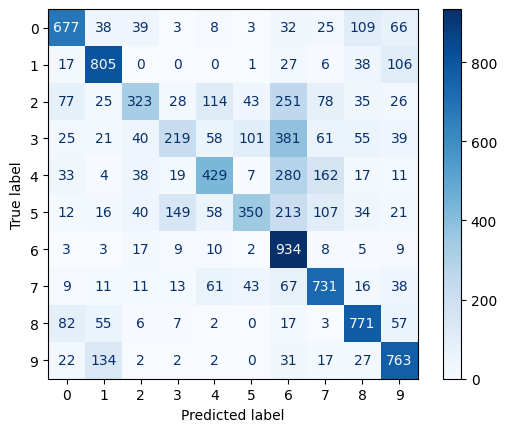

In [15]:
predicted_labels = np.argmax(cnn_model.predict(test_images), axis=1)
confusion_mat = confusion_matrix(test_labels, predicted_labels)
ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=range(10)).plot(cmap='Blues')
plt.show()

# **Plotting the training history**

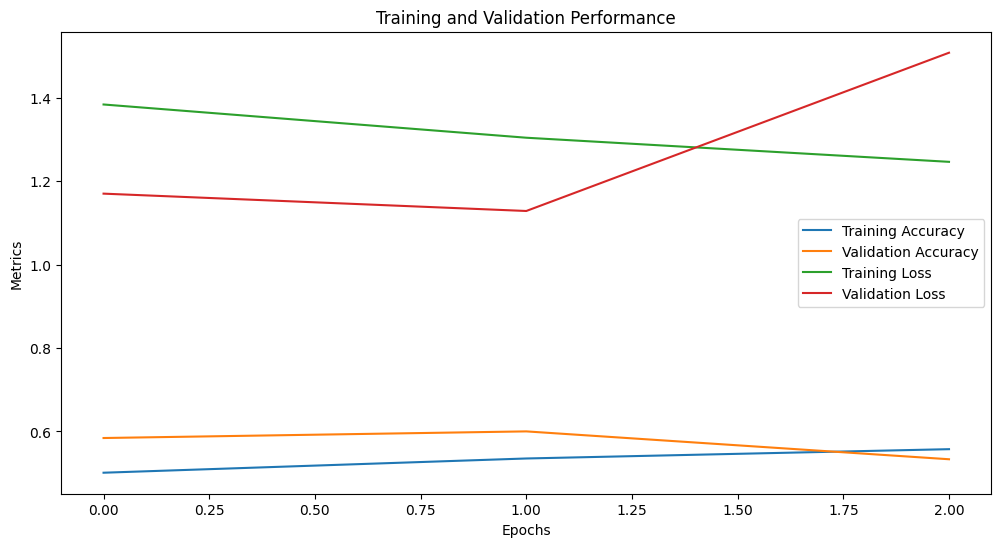

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Performance')
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

    Airplane       0.71      0.68      0.69      1000
  Automobile       0.72      0.81      0.76      1000
        Bird       0.63      0.32      0.43      1000
         Cat       0.49      0.22      0.30      1000
        Deer       0.58      0.43      0.49      1000
         Dog       0.64      0.35      0.45      1000
        Frog       0.42      0.93      0.58      1000
       Horse       0.61      0.73      0.67      1000
        Ship       0.70      0.77      0.73      1000
       Truck       0.67      0.76      0.71      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.58     10000
weighted avg       0.62      0.60      0.58     10000



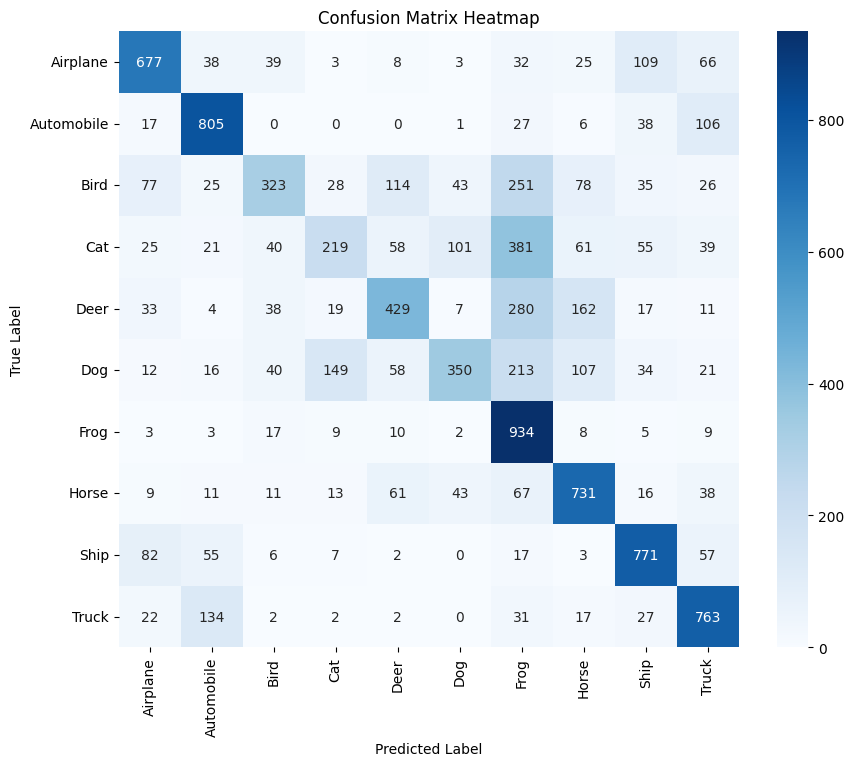

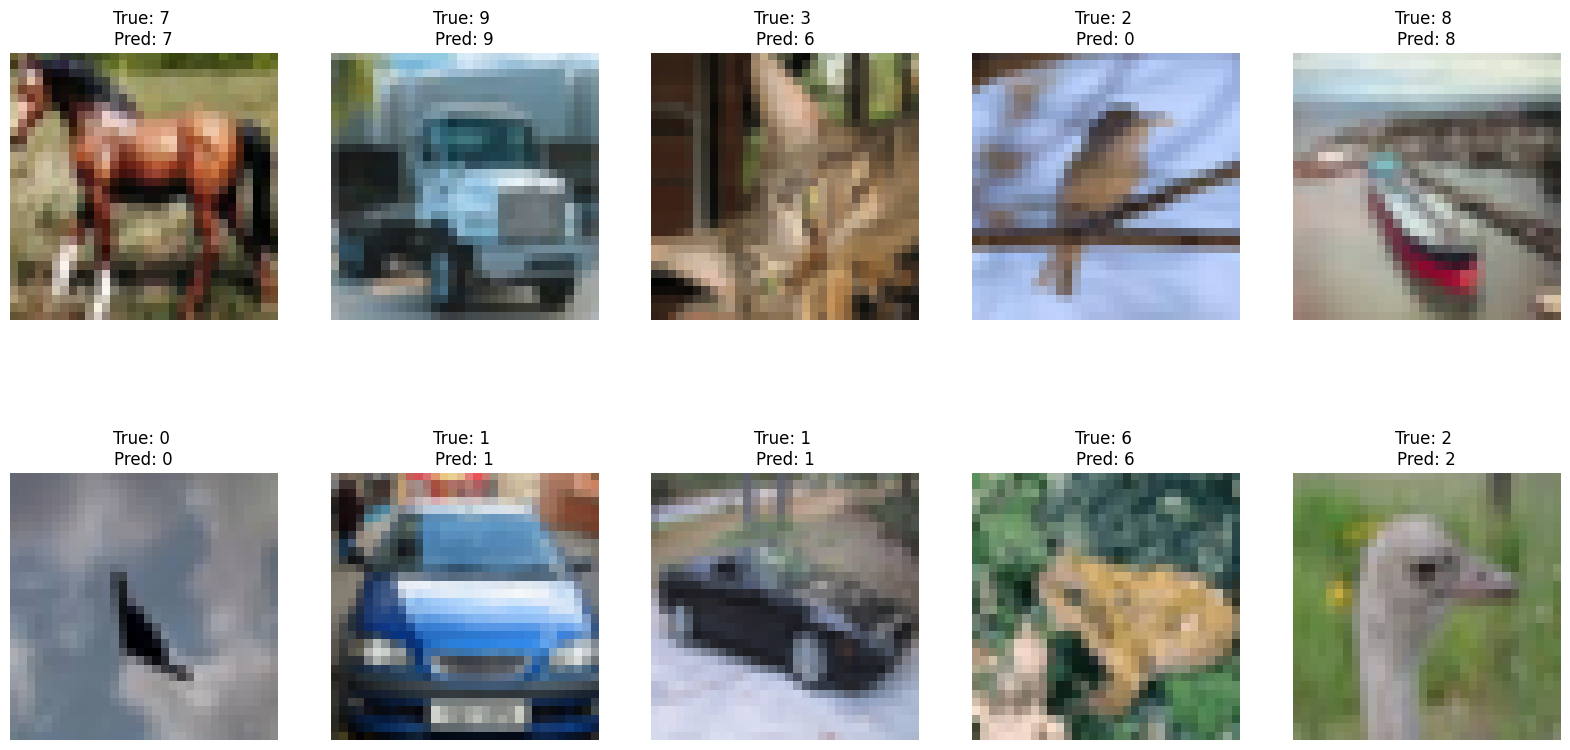

Model saved at cnn_cifar10_model.h5


Model loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6102 - loss: 1.1178
Loaded Model - Loss: 1.1286, Accuracy: 0.6002


In [17]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import seaborn as sns
import tensorflow as tf

# Step 1: Classification Report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]))

# Step 2: Enhanced Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
confusion_mat = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
], yticklabels=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 3: Visualize Sample Predictions
def display_sample_predictions(images, labels, predictions, num_samples=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        index = np.random.randint(0, len(images))
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[index])
        plt.title(f"True: {labels[index][0]} \nPred: {predictions[index]}")
        plt.axis('off')
    plt.show()

# Call the function to display random samples
display_sample_predictions(test_images, test_labels, predicted_labels)

# Step 4: Save the Model
model_path = 'cnn_cifar10_model.h5'
cnn_model.save(model_path)
print(f"Model saved at {model_path}")

# Step 5: Load the Model (if needed later)
loaded_model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# Step 6: Evaluate Loaded Model
loaded_loss, loaded_accuracy = loaded_model.evaluate(test_images, test_labels_one_hot)
print(f"Loaded Model - Loss: {loaded_loss:.4f}, Accuracy: {loaded_accuracy:.4f}")
